In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style ='white')
sns.set(style='whitegrid',
       color_codes = True)

from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from time import time
from IPython.display import display
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.svm import SVC
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/customers_data.csv')

In [3]:
df.head()

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31.0,35.0,False
1,1,65.16,male,yes,23.0,61.0,False
2,2,40.60,female,no,36.0,49.0,False
3,3,38.01,male,yes,47.0,57.0,False
4,4,22.32,female,yes,5.0,39.0,False


In [4]:
df=df.drop(columns=['Unnamed: 0'])

In [5]:
categorical = df.select_dtypes(include=['object']) 

In [6]:
for var in categorical.columns:
    print(var,categorical[var].value_counts())

gender male      60181
female    59819
Name: gender, dtype: int64
card_on_file yes    60087
no     59913
Name: card_on_file, dtype: int64


In [7]:
df_categorical2 = pd.get_dummies(categorical,drop_first=True)

In [8]:
df = df.drop(categorical.columns, axis=1)## axis=1 drops columns, axis=0 drops rows, by default the drop method drops rows.
df = pd.concat([df, df_categorical2], axis=1)## concat method joins dataframes, by index (default), again axis=1 combines they by row.
df.head()

,purch_amt,age,days_since_last_purch,loyalty,gender_male,card_on_file_yes
0,19.58,31.0,35.0,False,1,0
1,65.16,23.0,61.0,False,1,1
2,40.60,36.0,49.0,False,0,0
3,38.01,47.0,57.0,False,1,1
4,22.32,5.0,39.0,False,0,1


In [9]:
df.dtypes

purch_amt                float64
age                      float64
days_since_last_purch    float64
loyalty                     bool
gender_male                uint8
card_on_file_yes           uint8
dtype: object

In [10]:
df['loyalty']=df['loyalty'].map({True:1, False:0})

In [11]:
df.head()

,purch_amt,age,days_since_last_purch,loyalty,gender_male,card_on_file_yes
0,19.58,31.0,35.0,0,1,0
1,65.16,23.0,61.0,0,1,1
2,40.60,36.0,49.0,0,0,0
3,38.01,47.0,57.0,0,1,1
4,22.32,5.0,39.0,0,0,1


In [12]:
y=df['loyalty']
X=df.drop(['loyalty'],axis=1)
X.head()

,purch_amt,age,days_since_last_purch,gender_male,card_on_file_yes
0,19.58,31.0,35.0,1,0
1,65.16,23.0,61.0,1,1
2,40.60,36.0,49.0,0,0
3,38.01,47.0,57.0,1,1
4,22.32,5.0,39.0,0,1


In [17]:
df['loyalty'].mean()

0.16666666666666666

In [19]:
df.isnull().sum()

purch_amt                0
age                      0
days_since_last_purch    0
loyalty                  0
gender_male              0
card_on_file_yes         0
dtype: int64

In [15]:
#Let's see the accuracy scores for all of our models. 
models = []
results = []
names = []
print('\t   Accuracy\n\t score\t  std')
models.append(('KNN', KNeighborsClassifier()))
#models.append(('SVM', SVC(kernel='linear',C=1,gamma=0.001)))
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             n_estimators=500)))
models.append(('XGB',  XGBClassifier()))

for name, model in models:
    kfold = model_selection.KFold(n_splits = 3, random_state = 99)
    cv_results = model_selection.cross_val_score(model, X, y,
                                                cv = 3, 
                                                 scoring = 'accuracy')
    
    results.append(cv_results)
    names.append(name)
    msg = "%s:\t%.4f (%.4f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

	   Accuracy
	 score	  std
KNN:	0.8522 (0.0008)
LR:	0.8686 (0.0015)
RF:	0.8658 (0.0007)
XGB:	0.8683 (0.0009)


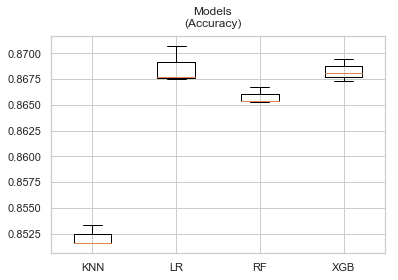

In [16]:
#Let's take a look at the Accuracy scores on a box plot
fig = plt.figure()
fig.suptitle('Models\n(Accuracy)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [18]:
#Let's see the recall scores for all of our models. 
models = []
results = []
names = []
print('\t   Accuracy\n\t score\t  std')
models.append(('KNN', KNeighborsClassifier()))
#models.append(('SVM', SVC(kernel='linear',C=1,gamma=0.001)))
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             n_estimators=500)))
models.append(('XGB',  XGBClassifier()))

for name, model in models:
    kfold = model_selection.KFold(n_splits = 3, random_state = 99)
    cv_results = model_selection.cross_val_score(model, X, y,
                                                cv = 3, 
                                                 scoring = 'recall')
    
    results.append(cv_results)
    names.append(name)
    msg = "%s:\t%.4f (%.4f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

	   Accuracy
	 score	  std
KNN:	0.4239 (0.0038)
LR:	0.4115 (0.0011)
RF:	0.3439 (0.0056)
XGB:	0.4167 (0.0032)


In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier ##import in my algorith.

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_label = DecisionTreeClassifier(max_depth=5)##give it a max depth of 5.
dt_label.fit(X_train, y_train)

In [ ]:
##Now lets try onehotencoding
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, dt_label.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending =False).head(8).plot(kind='bar', rot=45, figsize=(20,10));